In [ ]:
#필요한 라이브러리 import 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [ ]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [ ]:
train = train.drop(columns = ['PassengerId', 'Name', 'Destination'])
train['Cabin_1'] = train['Cabin'].str.split('/').str.get(0)
train['Cabin_3'] = train['Cabin'].str.split('/').str.get(2)
train = train.drop(columns = 'Cabin')

In [ ]:
train.columns

Index(['HomePlanet', 'CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Cabin_1', 'Cabin_3'],
      dtype='object')

In [ ]:
train[['CryoSleep', '']]

In [ ]:
train['CryoSleep'][train['CryoSleep'] == False] = 0
train['CryoSleep'][train['CryoSleep'] == True] = 1
train['VIP'][train['VIP'] == False] = 0
train['VIP'][train['VIP'] == True] = 1

test['CryoSleep'][test['CryoSleep'] == False] = 0
test['CryoSleep'][test['CryoSleep'] == True] = 1
test['VIP'][test['VIP'] == False] = 0
test['VIP'][test['VIP'] == True] = 1

In [ ]:
train = train.drop(columns = ['PassengerId', 'Name', 'Destination'])
train['Cabin_1'] = train['Cabin'].str.split('/').str.get(0)
train['Cabin_3'] = train['Cabin'].str.split('/').str.get(2)
train = train.drop(columns = 'Cabin')
train = pd.get_dummies(train)
train = train.dropna()

test = test.drop(columns = ['PassengerId', 'Name', 'Destination'])
test['Cabin_1'] = test['Cabin'].str.split('/').str.get(0)
test['Cabin_3'] = test['Cabin'].str.split('/').str.get(2)
test = test.drop(columns = 'Cabin')
test = pd.get_dummies(test)
test = test.dropna()

In [ ]:
train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_1_A,Cabin_1_B,Cabin_1_C,Cabin_1_D,Cabin_1_E,Cabin_1_F,Cabin_1_G,Cabin_1_T,Cabin_3_P,Cabin_3_S
0,39.0,0.0,0.0,0.0,0.0,0.0,False,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,True,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,True,1,0,0,...,0,0,0,0,0,1,0,0,0,1


# 이제 train으로 분포 확인하자!

In [ ]:
train.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'CryoSleep_0', 'CryoSleep_1', 'VIP_0', 'VIP_1',
       'Cabin_1_A', 'Cabin_1_B', 'Cabin_1_C', 'Cabin_1_D', 'Cabin_1_E',
       'Cabin_1_F', 'Cabin_1_G', 'Cabin_1_T', 'Cabin_3_P', 'Cabin_3_S'],
      dtype='object')

In [ ]:
train.Transported

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 7620, dtype: bool

In [ ]:
# 총 7620명 중에서
# VIP는 178명
print("총7620명 중에서")
print("VIP는: ", train[train['VIP_1'] == 1]['Age'].count(), "명")
print("실종된 사람수는: ", train[train['Transported'] == 1]['Age'].count(), "명")
print("냉동 수면은: ", train[train['CryoSleep_1'] == 1]['Age'].count(), "명")
print("화성 출발은: ", train[train['HomePlanet_Mars'] == 1]['Age'].count(), "명")
print("지구 출발은: ", train[train['HomePlanet_Earth'] == 1]['Age'].count(), "명")
print("목성 출발은: ", train[train['HomePlanet_Europa'] == 1]['Age'].count(), "명")

총7620명 중에서
VIP는:  178 명
실종된 사람수는:  3831 명
냉동 수면은:  2618 명
화성 출발은:  1539 명
지구 출발은:  4018 명
목성 출발은:  1881 명


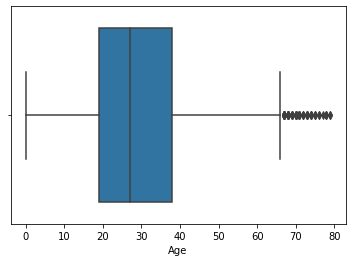

In [ ]:
sns.boxplot('Age', data=train)

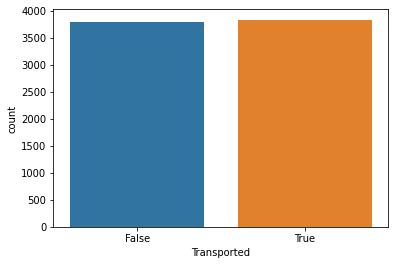

In [ ]:
sns.countplot('Transported', data=train)

In [ ]:
train.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_1_A,Cabin_1_B,Cabin_1_C,Cabin_1_D,Cabin_1_E,Cabin_1_F,Cabin_1_G,Cabin_1_T,Cabin_3_P,Cabin_3_S
Age,1.000000,0.067215,0.131877,0.032528,0.123957,0.103424,-0.076536,-0.208473,0.224648,0.017592,...,0.081612,0.109880,0.129879,0.081083,0.031203,-0.019866,-0.221969,0.012814,-0.009965,0.009945
RoomService,0.067215,1.000000,-0.015659,0.054898,0.011651,-0.018870,-0.243335,-0.137978,-0.066859,0.244231,...,-0.024666,-0.067013,-0.017701,0.164896,0.046048,0.083694,-0.144861,-0.004171,0.011071,-0.018962
FoodCourt,0.131877,-0.015659,1.000000,-0.013888,0.223261,0.224416,0.051097,-0.215407,0.375972,-0.128790,...,0.121737,0.161091,0.263077,0.023428,-0.041839,-0.137503,-0.153956,0.015408,-0.019062,0.018568
ShoppingMall,0.032528,0.054898,-0.013888,1.000000,0.014442,-0.004451,0.008356,-0.069510,-0.020994,0.115129,...,-0.014962,-0.006407,0.005530,0.047195,0.027180,0.073722,-0.108005,-0.006508,0.021021,-0.018442
Spa,0.123957,0.011651,0.223261,0.014442,1.000000,0.144365,-0.221511,-0.156800,0.268337,-0.089398,...,0.058472,0.126550,0.154352,0.039250,-0.012848,-0.089191,-0.125930,0.043451,-0.009268,0.002925
VRDeck,0.103424,-0.018870,0.224416,-0.004451,0.144365,1.000000,-0.207000,-0.154945,0.285280,-0.114097,...,0.103996,0.126752,0.203485,-0.001285,-0.022901,-0.095021,-0.129210,0.009558,0.004789,-0.002362
Transported,-0.076536,-0.243335,0.051097,0.008356,-0.221511,-0.207000,1.000000,-0.163539,0.176115,0.015206,...,-0.002506,0.140017,0.111692,-0.040070,-0.099436,-0.086145,0.017554,-0.011585,-0.107484,0.106365
HomePlanet_Earth,-0.208473,-0.137978,-0.215407,-0.069510,-0.156800,-0.154945,-0.163539,1.000000,-0.604657,-0.531331,...,-0.186327,-0.334592,-0.323616,-0.253478,-0.050998,0.070769,0.575066,-0.024205,0.018567,-0.014673
HomePlanet_Europa,0.224648,-0.066859,0.375972,-0.020994,0.268337,0.285280,0.176115,-0.604657,1.000000,-0.288010,...,0.302816,0.540672,0.522167,0.074515,-0.077248,-0.393751,-0.366959,0.026743,-0.043971,0.038579
HomePlanet_Mars,0.017592,0.244231,-0.128790,0.115129,-0.089398,-0.114097,0.015206,-0.531331,-0.288010,1.000000,...,-0.088751,-0.159373,-0.154145,0.236502,0.143746,0.331695,-0.322458,-0.011529,0.025889,-0.023812


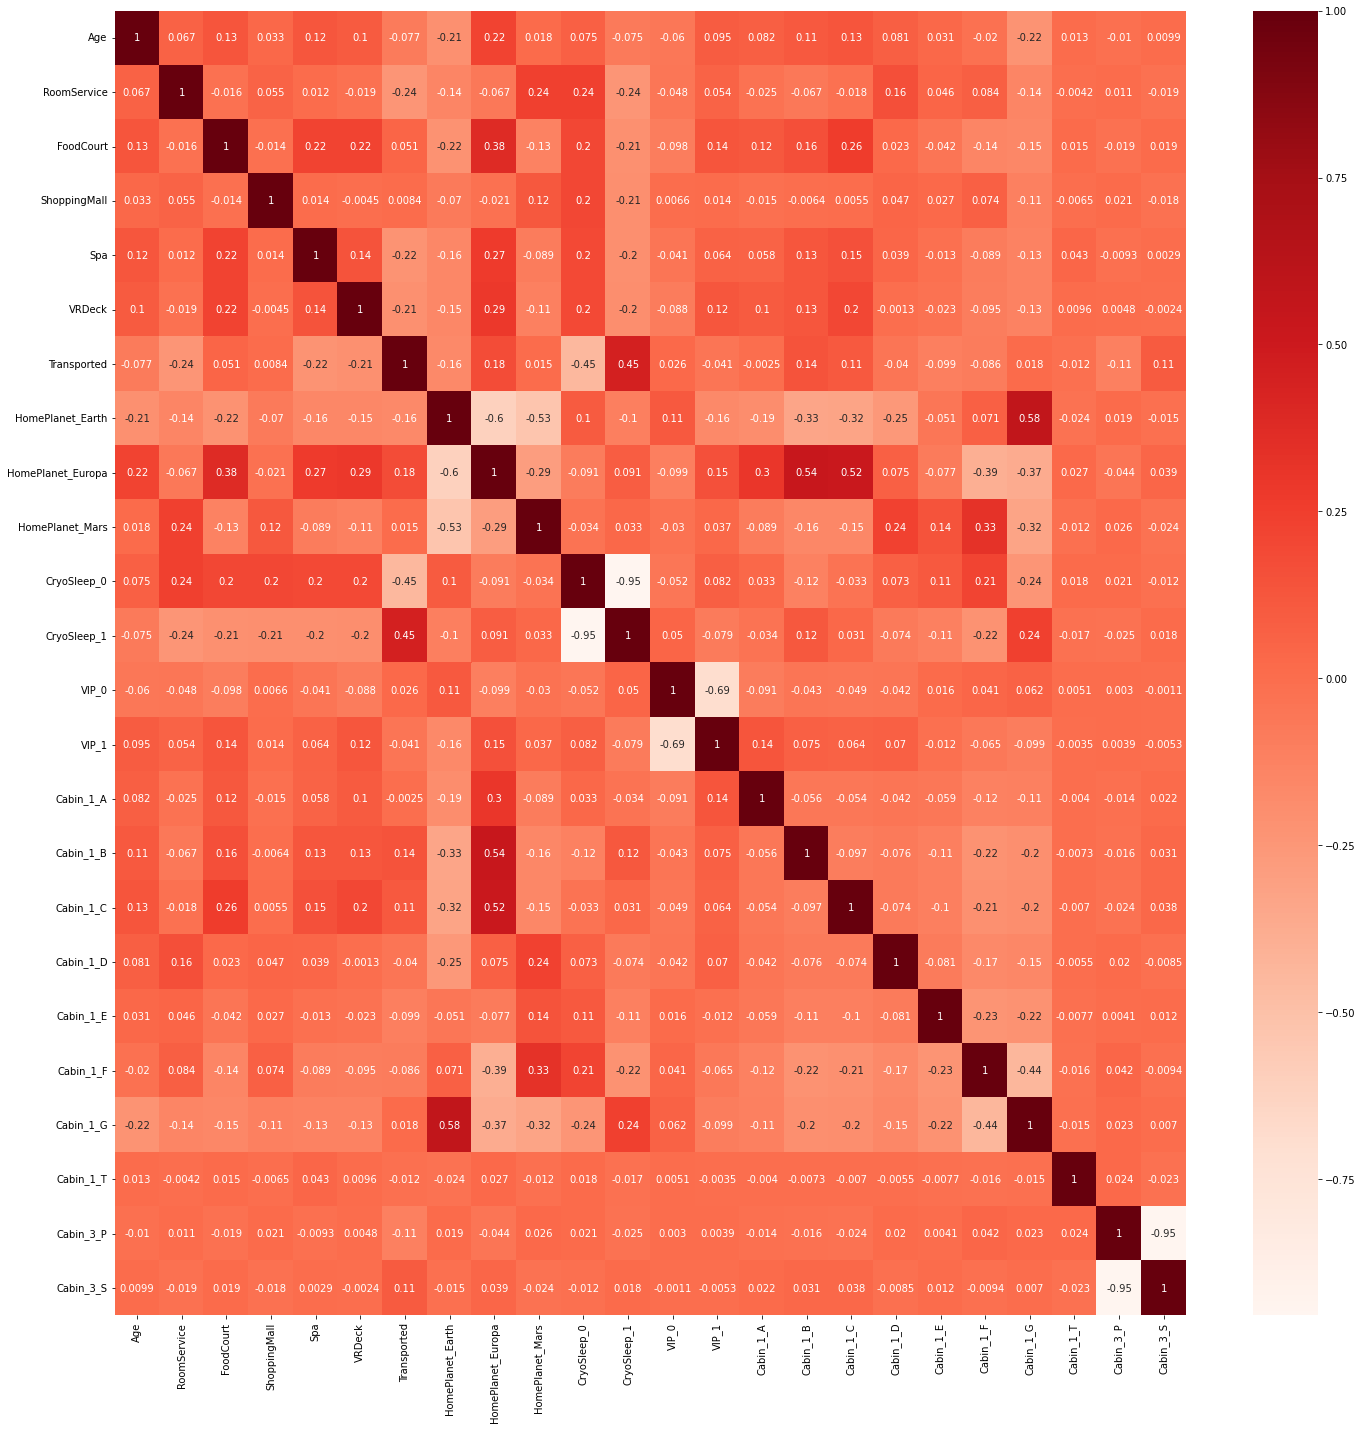

In [ ]:
fig, ax = plt.subplots(figsize=(24, 24))         # Sample figsize in inches

sns.heatmap(train.corr(), cmap='Reds', annot=True, ax=ax)